In [1]:
#importing useful libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math

<ipython-input-11-1ff528271a6b>:64: RuntimeWarning: covariance is not positive-semidefinite.
  samples = np.random.multivariate_normal(mean, covariance, size = nSamples)


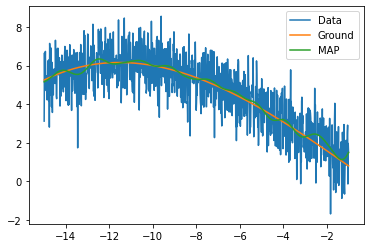

In [11]:
class curveFinder:
    
    '''This method creates synthetic data assuming Gaussian noise on a function with form of ...'''
    @staticmethod
    def dataGenerator(length, var):
        
        def function(x):

            y = (1/500)*(x+20)*x*(x-20)
            return y

        xground = np.linspace(-15, -1, length)
        yground = function(xground)

        vmatrix = np.diag(np.full(len(yground), var))
        data = np.random.multivariate_normal(mean = yground, cov = vmatrix)
        return xground, yground, data

    @staticmethod
    def matGenerator(nIndPts, xvect, nfine):

        def kernal(x, y):

            #Define constants for square kernal
            lambd = 10
            lexp = 1
            
            #Create empty matrix for covariance
            C = np.zeros((len(x), len(y)))
            
            #loop over all indecies in covariance matrix
            for i in range(len(x)):
                for j in range(len(y)):
                    #Determine each element of covariance matrix
                    C[i][j] = (lambd**2)*(math.exp(((-1)*((x[i]-y[j])**2))/(lexp**2)))
    
            #Return Covariance Matrix
            return C

        xindPts = np.linspace(-15, -1, nIndPts)
        xfine = np.linspace(-15, -1, nfine)
        C1 = kernal(xindPts, xvect)
        C2 = kernal(xvect, xindPts)
        C3 = kernal(xindPts, xindPts)
        C4 = kernal(xvect, xvect)
        C5 = kernal(xfine, xindPts)

        return C1, C2, C3, C4, C5

    @staticmethod
    def mvMeanCov(C1, C2, C3, C4, data, var):

        M = (1/var)*np.dot(np.linalg.inv(C3), np.dot(C1, np.dot(C2, np.linalg.inv(C3))))
        b = b = (1/var)*np.dot(np.linalg.inv(C3), np.dot(C1, data))

        mean = np.dot(np.linalg.inv(np.linalg.inv(C3) + M), b)
        covariance = np.linalg.inv(np.linalg.inv(C3) + M)

        return mean, covariance

    @staticmethod
    def sampler(mean, covariance, nSamples):

        samples = np.random.multivariate_normal(mean, covariance, size = nSamples)

        return samples

    @staticmethod
    def MAP(samples):

        return np.mean(samples, axis = 0)

    @staticmethod
    def fineGrid(map, Cind, Cfine):
        
        fineMAP = np.dot(Cfine, np.dot(np.linalg.inv(Cind), map))

        return fineMAP





var = 1
nData = 1000
nInd = 50
nsamples = 100
nfine = 500
x, yground, data = curveFinder.dataGenerator(nData, var)



C1, C2, C3, C4, C5 = curveFinder.matGenerator(nInd, x, nfine)

mutilda, ctilda = curveFinder.mvMeanCov(C1, C2, C3, C4, data, var)

samples = curveFinder.sampler(mutilda, ctilda, nsamples)
map = curveFinder.MAP(samples)
fineMAP = curveFinder.fineGrid(map, C3, C5)

plt.plot(x, data, label = "Data")
plt.plot(x, yground, label = "Ground")
#plt.plot(np.linspace(-15, -1, nInd), map)
plt.plot(np.linspace(-15, -1, nfine), fineMAP, label = "MAP")
plt.legend()

array([[ 1.60588955e-01, -8.02878608e-03, -1.08867174e-02, ...,
        -8.34954548e-06, -3.96082712e-06, -2.29322462e-06],
       [-8.02406717e-03,  3.73195613e-02,  1.38811959e-02, ...,
        -1.54907099e-06, -7.70381901e-07, -4.61339936e-07],
       [-1.08756319e-02,  1.38813305e-02,  3.00978745e-02, ...,
         7.95045982e-07,  4.21002764e-07,  2.22102505e-07],
       ...,
       [-7.33226672e-09,  1.60303530e-08, -2.29261412e-08, ...,
         3.00982308e-02,  1.38818046e-02, -1.08752884e-02],
       [-2.82312154e-08, -9.12612959e-09,  1.81745771e-08, ...,
         1.38818614e-02,  3.73194769e-02, -8.02428734e-03],
       [-1.96292145e-07, -2.89872062e-08, -9.43571121e-09, ...,
        -1.08753334e-02, -8.02432890e-03,  1.60590362e-01]])